# Arbres binaires de recherche

## Première implémentation : en créant deux classes ad hoc

Complétez la classe Noeud qui permet de créer des arbres avec la classe Arbre Pensez récursif.

In [42]:
from typing import *
from graphviz import Digraph
import random
from urllib.request import urlretrieve
import re

In [43]:
class Noeud:
    """
    Un noeud a une valeur et pointe vers deux autres noeuds (petit et
    grand) ou éventuellement le vide.
    On insère de nouvelles valeurs en partant de la racine du noeud et
    en bifurquant selon la comparaison avec la valeur du noeud.

    """

    def __init__(self, val):
        """
        Un noeud a toujours une valeur mais pointe vers un autre noeud
        ou éventuellement le vide (None)
        """
        self._val = val
        self._grand: Optional[Noeud] = None
        self._petit: Optional[Noeud] = None

    def insere(self, val):
        """
        Permet d'insérer une valeur dans un noeud.
        """
        '''
        if val < self._val:
            if self._petit is not None:
                self._petit._val = val
            else:
        '''
        if val != self._val:
            if val > self._val:
                if self._grand is None:
                    self._grand = Noeud(val)
                else:
                    self._grand.insere(val)
            else:
                if self._petit is None:
                    self._petit = Noeud(val)
                else:
                    self._petit.insere(val)

    def hauteur(self) -> int:
        """
        Nombre de niveaux de l'arbre
        """
        if self.est_feuille():
            return 0
        if self._petit is None:
            return self._grand.hauteur() + 1
        if self._grand is None:
            return self._petit.hauteur() + 1
        return max(self._grand.hauteur(), self._petit.hauteur()) + 1
    
    def nb_noeuds(self) -> int:
        if self.est_feuille():
            return 1
        if self._petit is None:
            return self._grand.nb_noeuds() + 1
        if self._grand is None:
            return self._petit.nb_noeuds() + 1
        return self._petit.nb_noeuds() + self._grand.nb_noeuds() + 1
    
    def est_feuille(self) -> bool:
        return self._petit is None and self._grand is None


    def nb_feuilles(self) -> int:
        if self.est_feuille():
            return 1
        if self._petit is None:
            return self._grand.nb_feuilles()
        if self._grand is None:
            return self._petit.nb_feuilles()
        return self._petit.nb_feuilles() + self._grand.nb_feuilles()
     
    def contient(self, v) -> bool:
        """
        Est-ce que v est une valeur contenue dans Noeud
        """
        if self._val == v:
            return True
        if v > self._val:
            if self._grand is None:
                return False
            return self._grand.contient(v)
        if self._petit is None:
            return False
        return self._petit.contient(v) 

    def visite_pre(self) -> None:
        """
        Que fait ce code ?
        Expliquez la différence avec les deux suivants
        Parcours prefixe de l'arbre, ou en pré-ordre
        Affiche les valeurs de la racine, puis fils gauche, puis fils droit
              [T]
            ⬈     ⬉
           [Y]   [O]
         ⬈      ⬈   ⬉
        [P]    [H] [N]

        Affiche

        -> T Y P O H N
        """
        print(self._val)
        for cote in [self._petit, self._grand]:
            if cote is not None:
                cote.visite_pre()

    def visite_post(self) -> None:
        """
        Parcours postfixe de l'arbre, ou en post-ordre
        Affiche les valeurs du fils gauche, puis fils droit, puis racine
              [T]
            ⬈     ⬉
           [Y]   [O]
         ⬈      ⬈   ⬉
        [P]    [H] [N]

        Affiche

        -> P Y H N O T
        """
        for cote in [self._petit, self._grand]:
            if cote is not None:
                cote.visite_post()
        print(self._val)

    def visite_inf(self) -> None:
        """
        Parcours infixe de l'arbre, ou en ordre
        Affiche les valeurs du fils gauche, puis racine, puis fils droit
              [T]
            ⬈     ⬉
           [Y]   [O]
         ⬈      ⬈   ⬉
        [P]    [H] [N]

        Affiche

        -> P Y T H O N
        """
        if self._petit is not None:
            self._petit.visite_inf()
        print(self._val)
        if self._grand is not None:
            self._grand.visite_inf()

    def visite_niveau(self) -> None:
        """
        On veut obtenir les noeuds par niveau i.e. classés dans l'ordre 
        croissant des distances à la racine aka parcours en largeur 
        """
        file = [self]
        affiches = [self]
        while file:
            noeud = file.pop()
            print(noeud._val)
            for fils in (noeud._petit, noeud._grand):
                if fils is not None and fils not in affiches:
                    file.insert(0, fils)
                    affiches.append(fils)

    def mini(self):
        """
        La plus petite valeur 
        """
        if self._petit is None:
            return self._val
        return self._petit.mini()
        
    def maxi(self):
        """
        la plus grande valeur
        """
        if self._grand is None:
            return self._val
        return self._grand.mini()
        
    #  Outils de représentation
    
    def viz(self):
        s = Digraph()
        def tree2viz(self):
            """
            À compléter...
            """
            v = self._val
            if self._petit and self._grand:
                s.node(f'{self._petit._val}', style='filled',fillcolor='cadetblue3')
                s.node(f'{self._grand._val}', style='filled',fillcolor='cadetblue3')
                s.edge(f'{v}', f'{self._petit._val}')
                s.edge(f'{v}', f'{self._grand._val}')
                tree2viz(self._petit)
                tree2viz(self._grand)
            elif self._petit and not self._grand:
                s.node(f'{self._petit._val}', style='filled',fillcolor='cadetblue3')
                s.edge(f'{v}', f'{self._petit._val}')
                tree2viz(self._petit)
            elif self._grand and not self._petit:
                s.node(f'{self._grand._val}', style='filled',fillcolor='cadetblue3')
                s.edge(f'{v}', f'{self._grand._val}')
                tree2viz(self._grand)
            else:
                s.node(f'nullg{v}',shape='point')
                s.edge(f'{v}', f'nullg{v}')
                s.node(f'nullp{v}',shape='point')
                s.edge(f'{v}', f'nullp{v}')
        tree2viz(self)
        return s

    def affiche(self):
        """
        """
        s = self.viz()
        s.graph_attr['ordering']='out'
        return s
    
    ## OPTIONNEL : utilisez turtle pour créer la représentation des arbres et/ou networks


In [44]:
N = Noeud(1);N.insere(2);N.insere(4);N.insere(3);N.insere(10);N.insere(6)

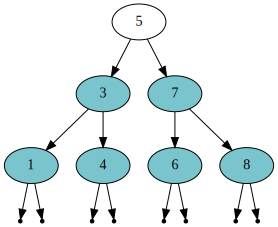

In [45]:
n = Noeud(5)   
for i in (3, 7, 1, 4, 6, 8):
    n.insere(i)
n.affiche()

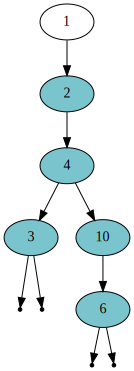

In [46]:
N.affiche()

In [47]:
#from nbr import *

class Arbre:
    """
    Arbre binaire de recherche constitué de noeuds.
    Reprend les méthodes de la classe Noeud en incluant le cas vide
    et en construisant un arbre à partir d'un noeud.
    """

    def __init__(self) -> None:
        """
        Constructeur : un arbre est vide ou constitué de noeuds
        """
        self._data = None

    def est_vide(self) -> bool:
        """
        Testeur : vérifie si un arbre est vide
        """
        return self._data is None

    def insere(self, val) -> None:
        """
        Insère un élément comparable dans un arbre selon le critère
        choisi pour les noeuds.
        Si l'arbre est vide, crée le noeud-data
        """
        if self._data is None:
            self._data = Noeud(val)
        else:
            self._data.insere(val)

    def hauteur(self) -> int:
        if self._data is None:
            return 0
        else:
            return self._data.hauteur()

    def nb_noeuds(self) -> int:
        if self._data is None:
            return 0
        else:
            return self._data.nb_noeuds()

    def est_feuille(self) -> bool:
        if self._data is None:
            return False
        else:
            return self._data.est_feuille()

    def nb_feuilles(self) -> int:
        if self._data is None:
            return 0
        else:
            return self._data.nb_feuilles()

    def contient(self, v) -> bool:
        if self._data is None:
            return False
        return self._data.contient(v)

    def visite_pre(self) -> None:
        if self._data:
            self._data.visite_pre()

    def visite_post(self) -> None:
        if self._data:
            self._data.visite_post()

    def visite_inf(self) -> None:
        if self._data:
            self._data.visite_inf()

    def visite_inf_imp(self) -> None:
        if self._data:
            self._data.visite_inf_imp()

    def visite_niveau(self) -> None:
        if self._data:
            self._data.visite_niveau()

    def mini(self):
        assert self._data, 'Arbre vide ! Pas de minimum'
        return self._data.mini()

    def maxi(self):
        assert self._data, 'Arbre vide ! Pas de maximum'
        return self._data.maxi()

    def affiche(self) -> None:
        assert self._data, 'Arbre vide'
        return self._data.affiche()

    def __str__(self) -> str:
        if self._data is None:
            return 'Arbre_Vide'
        else:
            return self._data.__str__()


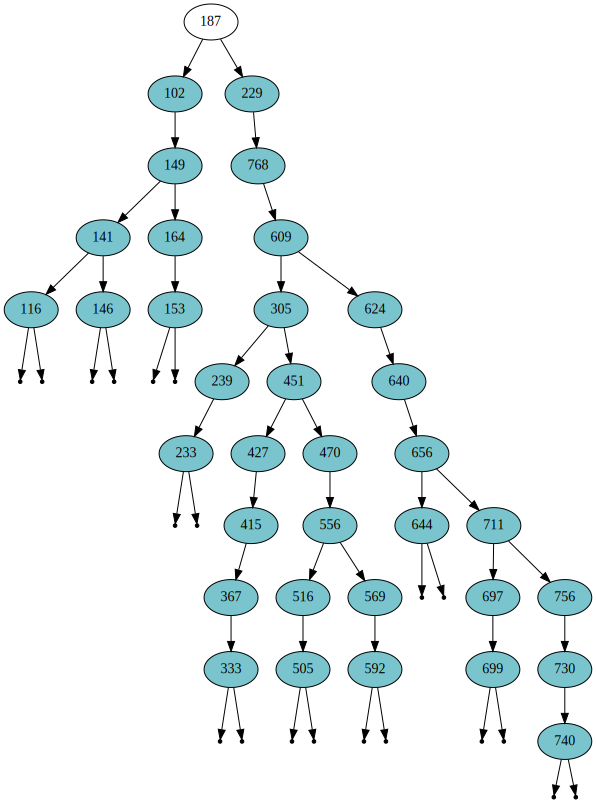

In [55]:
A = Arbre()

for k in random.sample(range(100,800), 35):
    A.insere(k)
    
A.affiche()

In [49]:
urlretrieve('https://www.gutenberg.org/files/2650/2650-0.txt', 'swann.txt')
fic = open('swann.txt', 'r').read()
texte = re.sub('[^A-ZÉÈÀÙÊÔÂÜÛÏÎa-zéèàùêôâüûïî]+', ' ', fic)
mots = {m.lower() for m in texte.split()}

sw = Arbre()
for mot in mots:
    sw.insere(mot)

In [50]:
sw.hauteur()

34

In [51]:
sw.nb_feuilles()

5270

In [52]:
sw.nb_noeuds()

15731

In [53]:
sw.contient('madeleine')

True

In [54]:
sw.contient('binaire')

False

## Autre implémentation : avec des dictionnaires

Un arbre serait un dictionnaire {Parent:(petit, grand)}. Comment obtenir les mêmes résultats que précédemment ?

In [ ]:
class ArbreBin:

    def __init__(self):
        self._data = {}

    def est_vide(self):
        return not self._data

    def insere(self, val):
        pass